In [1]:
#Import numpy, pandas and load wine data in a DataFrame
import numpy as np
import pandas as pd
from sklearn.datasets import load_wine

data = load_wine()
wine = pd.DataFrame(data.data, columns=data.feature_names)
wine.shape

(178, 13)

In [2]:
wine.columns

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline'],
      dtype='object')

In [3]:
#Display the basic statistics of the first 3 features
wine.iloc[:,:3].describe()

,alcohol,malic_acid,ash
count,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517
std,0.811827,1.117146,0.274344
min,11.030000,0.740000,1.360000
25%,12.362500,1.602500,2.210000
50%,13.050000,1.865000,2.360000
75%,13.677500,3.082500,2.557500
max,14.830000,5.800000,3.230000


In [4]:
wine.iloc[:,:3].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   alcohol     178 non-null    float64
 1   malic_acid  178 non-null    float64
 2   ash         178 non-null    float64
dtypes: float64(3)
memory usage: 4.3 KB


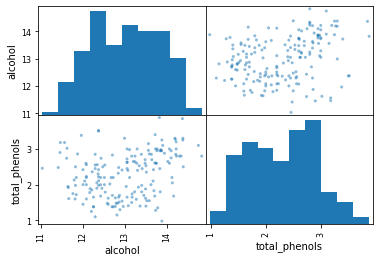

In [5]:
#Plot the data of two features using scatter_matrix for ease of display
#Ideally all the pairs of features should be examined
#In this case, two features have been picked to implement the algorithm
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
scatter_matrix(wine.iloc[:,[0,5]])
plt.savefig("plot.png")
plt.show()
X = wine[['alcohol', 'total_phenols']]

#As unsupervised models don't have a target, scatter plots help in coming up with a reasonable candidate or the best educated 
#guess for k, the number of clusters

In [6]:
#Unsupervised machine learning models do not require splitting data into training and testing sets, unlike supervised learning
#models
#Centroid-based algorithms require one pre-processing step as k-means works better on data where each attribute is of similar
#scales, mathematically z = (x - mean)/std, where x is the raw data, mean and std are the average and standard deviation of x, 
#and z is the scaled x such that it is centered at 0 and it has a unit standard deviation.
#Pre-process/Standardize using StandarScaler under the sklearn.preprocessing
from sklearn.preprocessing import StandardScaler
#Instantiate the scaler
scale = StandardScaler()
#Compute the respective means and std's of raw alcohol and total phenols to be used later for scaling
scale.fit(X)
#Extract the calculated mean and std
scale.mean_

array([13.00061798,  2.29511236])

In [7]:
scale.scale_

array([0.80954291, 0.62409056])

In [8]:
#Fit to the training data and transform
X_scaled = scale.transform(X)

In [9]:
#Verify the scaled features
X_scaled.mean(axis=0)

array([ 7.84141790e-15, -1.95536471e-16])

In [10]:
X_scaled.std(axis=0)

array([1., 1.])

<function matplotlib.pyplot.show(*args, **kw)>

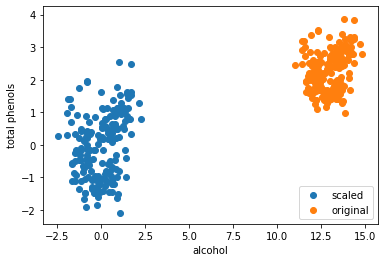

In [11]:
#Plot the original and scaled data
import matplotlib.pyplot as plt
plt.scatter(X_scaled[:,0], X_scaled[:,1], label='scaled'); plt.scatter(X.iloc[:,[0]], X.iloc[:,[1]], label='original') 
plt.xlabel('alcohol'); plt.ylabel('total phenols')
plt.legend(loc='lower right')
plt.savefig("plot.png")
plt.show

In [12]:
#K-means modeling
#Focus on the number of clusters, n_clusters (based on ), and allow other parameters to take the default values
#In scikit-learn, the initialization mechanism is set to k-means++, by default, which specifies a procedure to initialize
#the centroids before proceeding with the standard k-means algorithm
from sklearn.cluster import KMeans
#Instantiate the model
kmeans = KMeans(n_clusters = 3)
#Fit the model
kmeans.fit(X_scaled)
#Make predictions
y_pred = kmeans.predict(X_scaled)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 2, 2, 2,
       1, 2, 1, 2, 0, 1, 0, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 1, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1])

In [13]:
#Inspect the coordinates of the three centroids
kmeans.cluster_centers_

array([[ 0.05253603, -1.14020926],
       [ 0.92017418,  0.87087204],
       [-1.06183503,  0.08414606]])

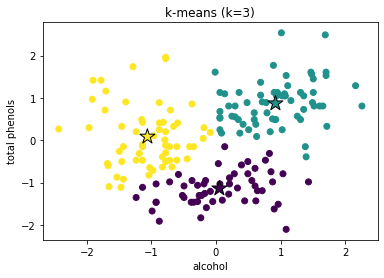

In [14]:
#Visualize the centroids
#Plot the scaled data
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c= y_pred)
#Identify the centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='*', s = 250, c = [0, 1, 2], edgecolors='k')
plt.xlabel('alcohol'); plt.ylabel('total phenols')
plt.title('k-means (k=3)')
plt.savefig("plot.png")
plt.show()

In [15]:
#Predict with new data
X_new = np.array([[13, 2.5]])
#Standardize the new data
X_new_scaled = scale.transform(X_new)
X_new_scaled

array([[-0.00076337,  0.32829793]])

In [16]:
#Predict the cluster
kmeans.predict(X_new_scaled)

array([1])

In [17]:
#Optimal k: the elbow method
#K-means problems partitions n data points into k tight sets such that the data points are closer to each other than to the
#data points in the other clusters
#The tightness can be measured as the sum of squares of the distance from data point to its nearest centroid - inertia
#Output distortion when k = 2
kmeans = KMeans(n_clusters=2)
kmeans.fit(X_scaled)
kmeans.inertia_

185.25081541190127

In [18]:
#Output distortion when k = 3
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_scaled)
kmeans.inertia_

114.34674038310786

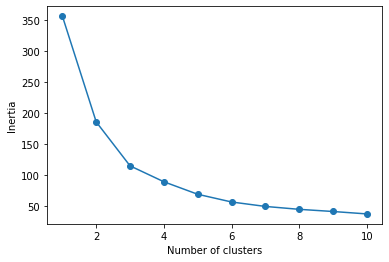

In [19]:
#Plot the inertia for different values of k to estimate the optimal k - the elbow method
#Calculate distortion for a range of number of cluster
inertia = []
for i in np.arange(1, 11):
    km = KMeans(n_clusters=i)
    km.fit(X_scaled)
    inertia.append(km.inertia_)
    
#Plot
plt.plot(np.arange(1, 11), inertia, marker = 'o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.savefig('plot.png')
plt.show()

In [20]:
#The inertia decreases as the number of clusters increases
#The optimal k should be where the inertia no longer decreases as rapidly
# For example, k=3 seems to be optimal
#The approach is called elbow method - a useful graphical tool to estimate the optimal k in k-means

In [21]:
#Model with more features instead of just two (alcohol and total phenols)
X = wine
scale = StandardScaler()
scale.fit(X)
X_scaled = scale.transform(X)
X_scaled[:10,:]

array([[ 1.51861254, -0.5622498 ,  0.23205254, -1.16959318,  1.91390522,
         0.80899739,  1.03481896, -0.65956311,  1.22488398,  0.25171685,
         0.36217728,  1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, -2.49084714,  0.01814502,
         0.56864766,  0.73362894, -0.82071924, -0.54472099, -0.29332133,
         0.40605066,  1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, -0.2687382 ,  0.08835836,
         0.80899739,  1.21553297, -0.49840699,  2.13596773,  0.26901965,
         0.31830389,  0.78858745,  1.39514818],
       [ 1.69154964, -0.34681064,  0.4879264 , -0.80925118,  0.93091845,
         2.49144552,  1.46652465, -0.98187536,  1.03215473,  1.18606801,
        -0.42754369,  1.18407144,  2.33457383],
       [ 0.29570023,  0.22769377,  1.84040254,  0.45194578,  1.28198515,
         0.80899739,  0.66335127,  0.22679555,  0.40140444, -0.31927553,
         0.36217728,  0.44960118, -0.03787401],
       [ 1.48155459, -0.517366

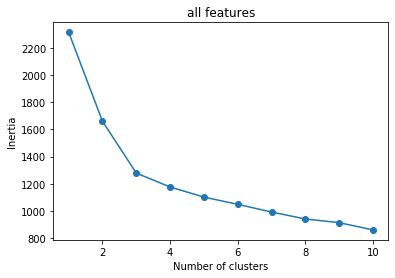

In [22]:
#Plot the inertia for a range of k to determine the optimal k via elbow method
inertia = []
for i in np.arange(1, 11):
    km = KMeans(n_clusters=i)
    km.fit(X_scaled)
    inertia.append(km.inertia_)
    
plt.plot(np.arange(1, 11), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('all features')
plt.savefig('plot.png')
plt.show()

In [23]:
#Finalize the model by settinhg n_clusters = 3
k_opt = 3
kmeans = KMeans(k_opt)
kmeans.fit(X_scaled)
y_pred = kmeans.predict(X_scaled)
y_pred

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [24]:
#Compared to the predictions using only two features, the two models produce very similar results
#Clustering is an unsupervised learning method
#So, it is difficult to determine that the model with 2 features is more accurate in grouping wines than the one with all 13
#features, or vice versa
#In practice, the features are often chosen by the collaboration between data scientists and domain knowledge experts